# Analysis of air disasters from 1919 to 2023

### Data dictionary
![alt text](https://drive.google.com/uc?id=1eceuDk2mKCTOUbeN3d5URCdW8ulpjf8N)

---
### Objectives
Conduct a thorough analysis of all aircraft accidents that occurred between 1919 and 2023 in order to provide insights into:
1. Which country has the most accidents?
2. Do accidents happen more frequently on certain days?
3. Which are the safest operators?
4. Which airplane model caused the most deaths?
5. How have flights changed since September 11, 2001?
6. Create a cartogram showing the number of accidents by country
7. What types of accidents caused more or fewer fatalities?
---
### Index



```
Library

  0. Dataset
  1. Data Preprocessing
  2. Which country has the most accidents?
  3. Do accidents happen more frequently on certain days?
  4. Which are the safest operators?
  5. Which airplane model caused the most deaths?
  6. How have flights changed since September 11, 2001?
  7. Create a cartograms in order tho show the number of accidents by country
  8. What types of accidents caused more or fewer fatalities?
```



#### Library


In [67]:
# Library
import pandas as pd
from datetime import datetime, date
# Charts
from matplotlib import pyplot as plt
from matplotlib import colors as cols
from ctypes import alignment

# Cartogram
import matplotlib.patches as mpatches
import geopandas as gpd
from geopy import geocoders
from geopy.geocoders import Nominatim

# Setting
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100

#### 0. Dataset

In [68]:
# Upload data

df=pd.read_csv("https://raw.githubusercontent.com/VincenzoPaternoster/Python-Analysis-of-air-disasters-from-1919-to-2023/refs/heads/main/data/aviation_accidents.csv")

df.info() # data has 23967 rows but there are columns with several Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


#### 1. Data preprocessing

##### 1.1 Handling Na values

In [69]:
# Drop any rows with one NaN

df=df.dropna()

df.info() # With dropna() all rows with at least one NaN were deleted
            # From 23697 to 186643 entries


<class 'pandas.core.frame.DataFrame'>
Index: 18643 entries, 4 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          18643 non-null  object
 1   type          18643 non-null  object
 2   registration  18643 non-null  object
 3   operator      18643 non-null  object
 4   fatalities    18643 non-null  object
 5   location      18643 non-null  object
 6   country       18643 non-null  object
 7   cat           18643 non-null  object
 8   year          18643 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


##### 1.2 Handling "unknown" and special character

In [70]:
## Remove "unknown" entries and special character in each column
df_2 = df[~df["date"].str.contains("date unk.", na=False) &
              ~df["year"].str.contains("unknown", na=False) &
              ~df["registration"].str.fullmatch("-", na=False) &
              ~df["registration"].str.fullmatch("unreg.", na=False) &
              ~df["fatalities"].astype(str).str.contains(r"\+", na=False) &
              ~df["date"].str.contains(r"\?", na=False)].copy()

# Remove prefix "near" from location
df_2["location"] = df_2["location"].str.replace("^near ", "", regex=True)

df_2.info() # from 18643 to 18098


<class 'pandas.core.frame.DataFrame'>
Index: 18098 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          18098 non-null  object
 1   type          18098 non-null  object
 2   registration  18098 non-null  object
 3   operator      18098 non-null  object
 4   fatalities    18098 non-null  object
 5   location      18098 non-null  object
 6   country       18098 non-null  object
 7   cat           18098 non-null  object
 8   year          18098 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


#### 2. Which country has the most accidents?

In [71]:
#1 Which country has the most accidents?

## 1.1 Count accidents
diz_acc={}

# Count accidents for every country
for i in df_2["country"].unique():
     count=df_2["country"][df_2["country"]==i].count()
     diz_acc[i]=count

max_acc=dict(sorted(diz_acc.items(),key=lambda item:item[1],reverse=True))

d_acc=pd.DataFrame({"Country":list(max_acc.keys())[0:10],
                    "Accidents":list(max_acc.values())[0:10]})


In [72]:
# Create addlabel function to add labels to the x-axis
def addlabel(x,y):
    for i in range(len(x)):
      plt.text(i,y[i]+10,y[i],ha="center",fontsize=10)



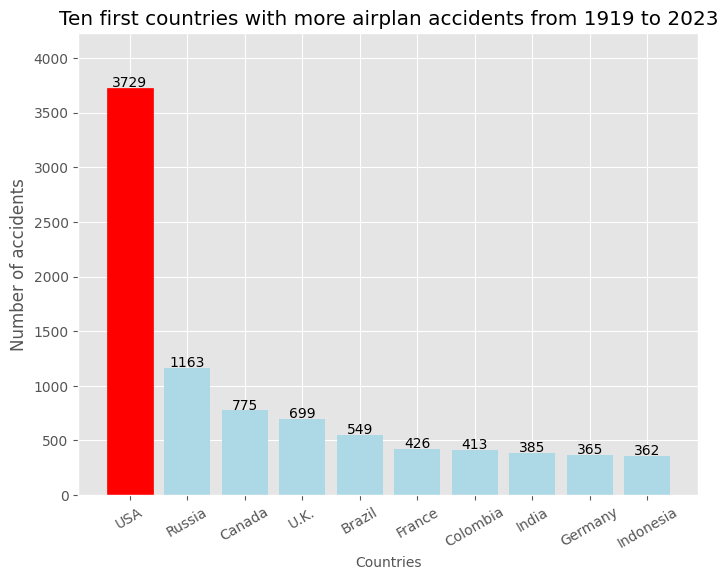

In [73]:
# 1.2 Show result with a barchart

# Create barchart
plt.style.use("ggplot")
barlist=plt.bar(d_acc["Country"], d_acc["Accidents"],color="lightblue")

# Higlight first country with most airplan accidents
barlist[0].set_color("r")
plt.title("Ten first countries with more airplan accidents from 1919 to 2023")

# Define y limits
plt.ylim(0,max(d_acc["Accidents"]+500))

# Edit label
plt.ylabel("Number of accidents")
plt.xticks(rotation=30)
plt.xlabel("Countries",fontsize=10)

# Add values label
addlabel(d_acc["Country"], d_acc["Accidents"].reset_index(drop=True))
plt.show()


In [74]:
df_2

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


#### 3. Do accidents happen more frequently on certain days?


In [75]:
#2 Do accidents happen more frequently on certain days?

# Convert column date in type datetime
df_2["date"] = pd.to_datetime(df_2["date"], format="%d-%b-%Y",errors="coerce")
df_2 = df_2.dropna(subset=["date"])

# Get days
df_2["day"] = df_2["date"].dt.day_name()
df_2


,date,type,registration,operator,fatalities,location,country,cat,year,day
62,1919-08-11,Felixstowe Fury,N123,RAF,1,Felixtowe RNAS,U.K.,A1,1919,Monday
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,Monday
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,El Shereik,Sudan,A1,1920,Wednesday
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,Wednesday
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920,Tuesday
...,...,...,...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023,Thursday
23963,2023-05-11,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023,Thursday
23964,2023-05-12,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023,Friday
23965,2023-05-14,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023,Sunday


In [76]:
## Get day with most accidents
days_acc=df_2[["day","year"]]
days_acc=days_acc.groupby("day").count().reset_index()
days_acc=days_acc.rename(columns={"day":"day", "year":"accidents"})
days_acc=days_acc.sort_values(by="accidents",ascending=False)
days_acc


,day,accidents
0,Friday,2783
6,Wednesday,2757
4,Thursday,2741
5,Tuesday,2683
1,Monday,2562
2,Saturday,2414
3,Sunday,2158


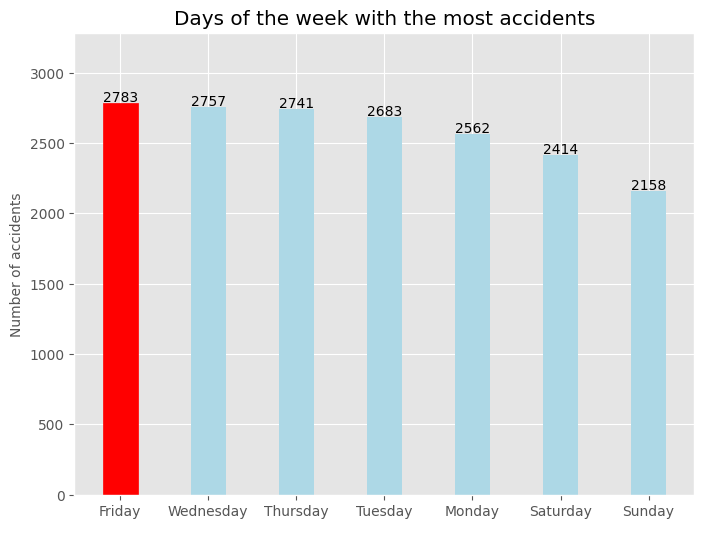

In [77]:
# Create barchart
barlist2=plt.bar(
            days_acc["day"],
            days_acc["accidents"],
            width=0.40,
            color="lightblue")

# Highlight day with the most accidents
barlist2[0].set_color("r")

# Define y limits
plt.ylim(0,max(days_acc["accidents"]+500))

# Edit label
plt.title("Days of the week with the most accidents")
plt.gca().set_ylabel("Number of accidents",fontsize=10)
plt.gca().set_xlabel(" ",fontsize=10)

# Add values label
addlabel(days_acc["day"],days_acc["accidents"].reset_index(drop=True))
plt.show()

#### 4. Which are the safest operators?

In [78]:
#3 Which are the safest operators?
## Get dataset with only operators and fatalities
df_safe=df_2.groupby("operator")["fatalities"].count().reset_index()

## Sort dataset
df_safe=df_safe.sort_values(by="fatalities",ascending=False).reset_index()

df_safe

,index,operator,fatalities
0,5265,USAF,900
1,5260,USAAF,821
2,4075,RAF,704
3,5253,US Navy,463
4,5643,private,250
...,...,...,...
5645,5623,Zeliff Aviation,1
5646,5625,Zeus-Avia,1
5647,5626,Zhong Fei General Aviation Co.,1
5648,5627,Ziegler Inc,1


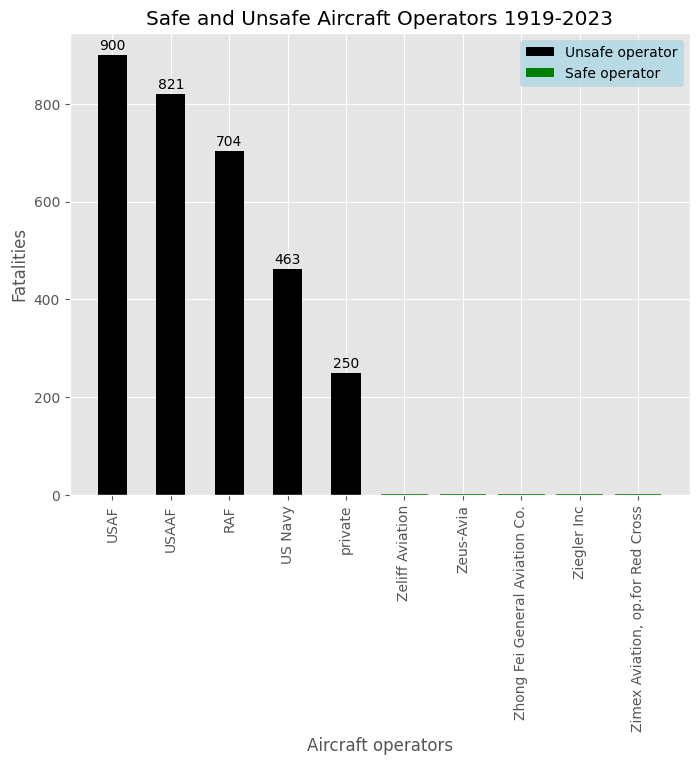

In [79]:
## Create barchart
plt.figure(figsize=(8,6))

# Bar chart with the top five most dangerous operators
plt.bar(df_safe["operator"].head(5),
        df_safe["fatalities"].head(5),label="Unsafe operator",color="black",width=0.50)

# Bar chart with the five least dangerous operators
plt.bar(df_safe["operator"].tail(5),
        df_safe["fatalities"].tail(5),
        label="Safe operator",
        color="green",)


# Edit label
plt.xticks(rotation=90,fontsize=10)
plt.gca().set_ylabel("Fatalities")
plt.gca().set_xlabel("Aircraft operators")

# Add values label
addlabel(df_safe["operator"].head(5),
        df_safe["fatalities"].head(5).reset_index(drop=True))

addlabel(df_safe["operator"].tail(5),
        df_safe["fatalities"].tail(5).reset_index(drop=True))

# Title
plt.title("Safe and Unsafe Aircraft Operators 1919-2023")
# Legend
plt.legend(facecolor="lightblue")

plt.show()

#### 5. Which airplane model caused the most deaths?

In [80]:
#4 Which airplane model caused the most deaths?

mod_death=df_2.groupby("type")["fatalities"].count().reset_index()
mod_death=mod_death.sort_values(by="fatalities",ascending=False)
mod_death.head(10)

,type,fatalities
1598,Douglas C-47A (DC-3),1079
1599,Douglas C-47B (DC-3),358
1595,Douglas C-47 (DC-3),323
159,Antonov An-2R,283
1498,DHC-6 Twin Otter 300,248
1215,Cessna 208B Grand Caravan,240
1392,Curtiss C-46A,223
2248,Junkers Ju-52/3m,147
1807,Douglas Dakota III (DC-3),144
1808,Douglas Dakota IV (DC-3),142


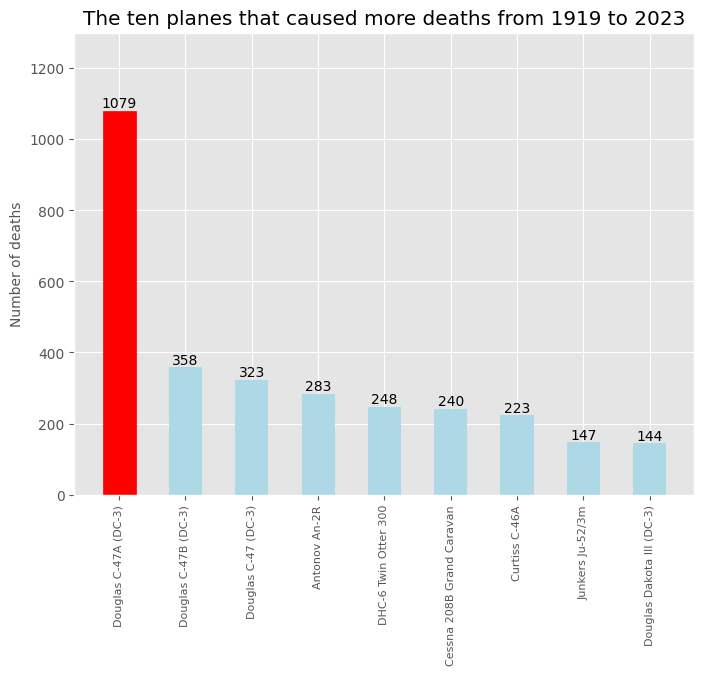

In [81]:
## Create barchart
barlist3=plt.bar(mod_death["type"][0:9],
        mod_death["fatalities"][0:9],
        color="lightblue",
        width=0.50)

# Change y limits
plt.ylim(0,1300)

# Highlight first plane
barlist3[0].set_color("r")

# Add values label
addlabel(mod_death["type"][0:9],mod_death["fatalities"][0:9].reset_index(drop=True))

plt.xticks(fontsize=8,rotation=90)
plt.title("The ten planes that caused more deaths from 1919 to 2023")
plt.gca().set_ylabel("Number of deaths",fontsize=10)


plt.show()

#### 6. How have flights changed since September 11, 2001?

In [82]:
#5 How have flights changed since September 11, 2001?
eleven=date(2001,9,11)
df_2["date"] = pd.to_datetime(df_2["date"], errors="coerce").dt.date.copy()

In [83]:
# Filter the dfset for dates before and after 2001,9,11
mask_bf=eleven>df_2["date"]
mask_af=eleven<df_2["date"]

df_bf=df_2[mask_bf]
df_af=df_2[mask_af]

In [84]:
# View flight trends by date and deaths before and after 2001 9 11

trend_flight_af=df_af.groupby("date")["fatalities"].count().reset_index()

trend_flight_bf=df_bf.groupby("date")["fatalities"].count().reset_index()

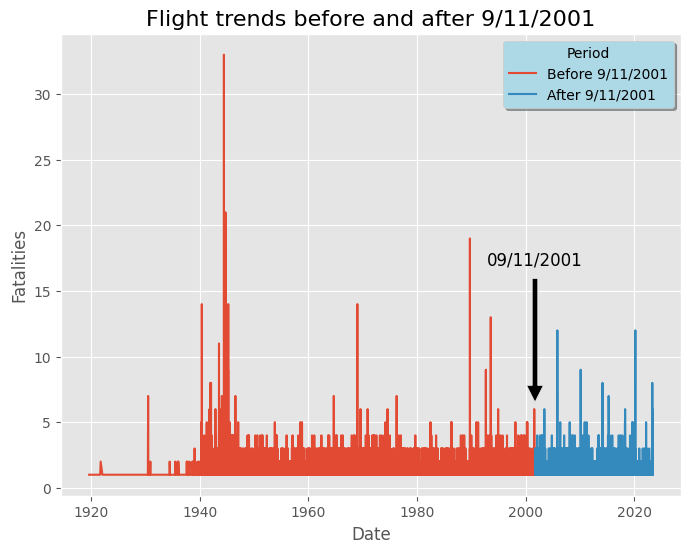

In [85]:
# Create chart
# Create two charts with before and after 09/11
plt.plot(trend_flight_bf["date"],trend_flight_bf["fatalities"],label="Before 9/11/2001")
plt.plot(trend_flight_af["date"],trend_flight_af["fatalities"],label="After 9/11/2001")

plt.title("Flight trends before and after 9/11/2001",fontsize=16)

# Edit axis label
plt.xlabel("Date")
plt.ylabel("Fatalities")
plt.legend(title="Period",facecolor="lightblue",shadow=True)

# Note where 09/11 is in the graph
plt.annotate("09/11/2001",
             xy=(eleven, max(trend_flight_af["fatalities"]/2)),
             xytext=(eleven, max(trend_flight_af["fatalities"]) + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             ha="center")

plt.show()

#### 7. Create a cartograms in order to show the number of accidents by country


In [86]:
#6 Create a cartogram showing the number of accidents by country

# Create dataset of countries with number of accidents

num_acc=df_2.groupby("country").count().reset_index()
num_acc=num_acc.drop(["date","type","registration","operator","fatalities","location","cat","day"],axis=1)
dc_acc=num_acc.rename(columns={"year":"accidents"})
dc_acc=dc_acc.sort_values(by="accidents",ascending=False).reset_index(drop=True)
dc_acc



,country,accidents
0,USA,3729
1,Russia,1163
2,Canada,775
3,U.K.,699
4,Brazil,549
...,...,...
225,Mauritius,1
226,St.Pierre & Miquelon,1
227,St. Helena,1
228,Reunion,1


In [87]:
# Change ambiguos name of countries
dc_acc["country"] = (
    dc_acc["country"]
    .str.replace(r"\.", "", regex=True)
    .str.strip()
    .replace({
        "UK": "United Kingdom",
        "U K": "United Kingdom",
        "USA": "United States",
        "US": "United States",
        "Russia": "Russian Federation"
    })
)


In [88]:
# Get latitude and longitude of countries with Nominatim API
from time import sleep

geolocator = Nominatim(
    user_agent="myapplication",
    timeout=10
)

diz_geo = {}

# Match each country to its latitude and longitude
for country in dc_acc["country"].iloc[:49]:
    try:
        location = geolocator.geocode(country)
        if location:
            diz_geo[country] = (location.latitude, location.longitude)
        else:
            diz_geo[country] = (None, None)
        sleep(1)  # IMPORTANT: respect Nominatim policy
    except Exception as e:
        print(f"Error for {country}: {e}")
        diz_geo[country] = (None, None)
        sleep(1)


diz_geo





{'United States': (39.7837304, -100.445882),
 'Russian Federation': (64.6863136, 97.7453061),
 'Canada': (61.0666922, -107.991707),
 'United Kingdom': (54.7023545, -3.2765753),
 'Brazil': (-10.3333333, -53.2),
 'France': (46.603354, 1.8883335),
 'Colombia': (4.099917, -72.9088133),
 'India': (22.3511148, 78.6677428),
 'Germany': (51.1638175, 10.4478313),
 'Indonesia': (-2.4833826, 117.8902853),
 'Mexico': (23.6585116, -102.0077097),
 'Australia': (-24.7761086, 134.755),
 'Vietnam': (15.9266657, 107.9650855),
 'Italy': (42.6384261, 12.674297),
 'Argentina': (-34.9964963, -64.9672817),
 'Spain': (39.3260685, -4.8379791),
 'Japan': (36.5748441, 139.2394179),
 'China': (35.000074, 104.999927),
 'Atlantic Ocean': (13.581921, -38.320312),
 'Philippines': (12.7503486, 122.7312101),
 'Venezuela': (8.0018709, -66.1109318),
 'DR Congo': (-2.9814344, 23.8222636),
 'PN Guinea': (19.5547484, -71.0750913),
 'Bolivia': (-17.0568696, -64.9912286),
 'Myanmar': (17.1750495, 95.9999652),
 'Ukraine': (49.

In [89]:
# Add input diz_geo in dataset

# From dict to dataframe
geo_cord=pd.DataFrame.from_dict(diz_geo,orient="index")
geo_cord=geo_cord.rename(columns={0:"latitude",1:"longitude"})
geo_cord.index.name="country"
geo_cord=geo_cord.reset_index()
geo_cord


,country,latitude,longitude
0,United States,39.783730,-100.445882
1,Russian Federation,64.686314,97.745306
2,Canada,61.066692,-107.991707
3,United Kingdom,54.702354,-3.276575
4,Brazil,-10.333333,-53.200000
5,France,46.603354,1.888334
6,Colombia,4.099917,-72.908813
7,India,22.351115,78.667743
8,Germany,51.163818,10.447831
9,Indonesia,-2.483383,117.890285


In [90]:
# Merge two dataset by country
df_geo=dc_acc.merge(geo_cord,how="inner",on="country")
df_geo

,country,accidents,latitude,longitude
0,United States,3729,39.783730,-100.445882
1,Russian Federation,1163,64.686314,97.745306
2,Canada,775,61.066692,-107.991707
3,United Kingdom,699,54.702354,-3.276575
4,Brazil,549,-10.333333,-53.200000
5,France,426,46.603354,1.888334
6,Colombia,413,4.099917,-72.908813
7,India,385,22.351115,78.667743
8,Germany,365,51.163818,10.447831
9,Indonesia,362,-2.483383,117.890285


In [91]:
# Create Geodataframe (gdf)

gdf_1 = gpd.GeoDataFrame(
    df_geo, geometry=gpd.points_from_xy(df_geo["longitude"], df_geo["latitude"]), crs="EPSG:4326"
)

gdf=gdf_1[0:10]

* *Files used for the cartogram are avalaible at this* [link](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

1. ne_110m_admin_0_countries.dbf
2. ne_110m_admin_0_countries.shp
3. ne_110m_admin_0_countries.shx

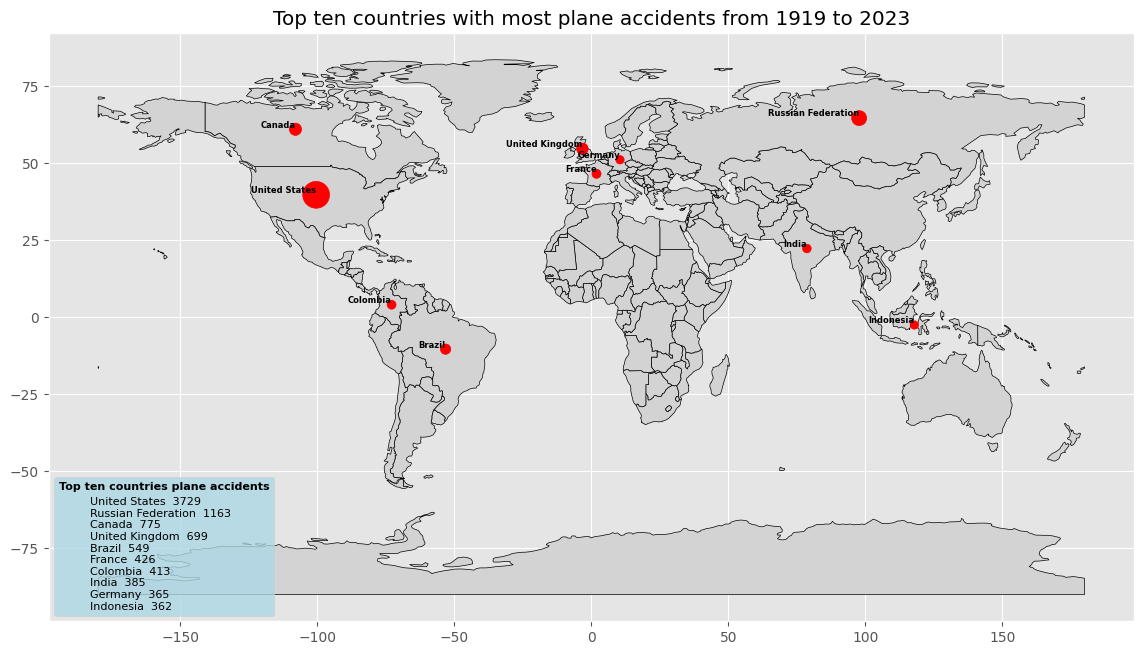

In [92]:
# Create cartogram with marker

# Upload the basemap of world
!wget -q https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip -oq ne_110m_admin_0_countries.zip
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Plot map and edit features
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Points and dimensions for accidents
gdf.plot(ax=ax, markersize=gdf["accidents"][0:10] / 10, color="red", alpha=1,label=gdf["country"])


# Add label for top ten countries with most plane accidents
for x, y, label in zip(gdf["longitude"][0:10], gdf["latitude"][0:10], gdf["country"]):
    plt.text(x, y, label, fontsize=6, ha="right", va="bottom", color="black", fontweight="bold")

# Add features legend
legend_text = "\n".join(f"{country}  {accidents}" for country,accidents in zip(gdf["country"][0:10],gdf["accidents"][0:10].tolist()))

legend=plt.legend([legend_text], title="Top ten countries plane accidents",
           loc="lower left", fancybox=True, fontsize=8, markerscale=0, frameon=True,
           alignment="left",facecolor="lightblue")

legend.get_title().set_fontsize('8')
legend.get_title().set_fontweight("bold")
plt.title("Top ten countries with most plane accidents from 1919 to 2023")
plt.show()

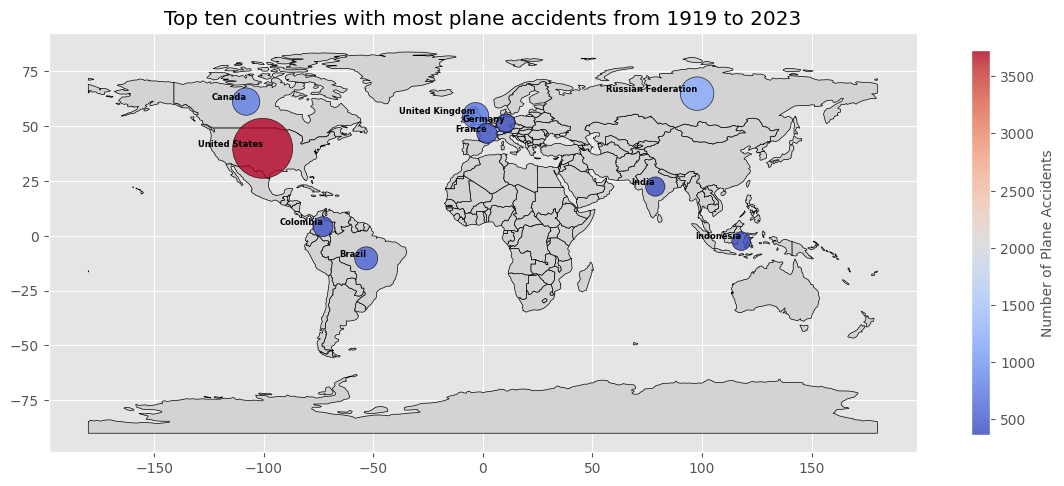

In [93]:
# Create cartogram with bubble

# Upload the basemap of world

world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Plot map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize data for colormap
norm = cols.Normalize(vmin=gdf['accidents'].min(), vmax=gdf['accidents'].max())

# Use scatter plot with colormap
scatter = ax.scatter(
    gdf["longitude"][:10], gdf["latitude"][:10],
    s=gdf["accidents"][:10]/2,  # bubble size based on accidents
    c=gdf["accidents"][:10],    # color intensity based on accidents
    cmap="coolwarm", norm=norm, alpha=0.80, edgecolors="black")


# Add label for top ten countries with most plane accidents
for x, y, label in zip(gdf["longitude"][0:10], gdf["latitude"][0:10], gdf["country"][0:10]):
    plt.text(x, y, label, fontsize=6, ha="right", va="bottom", color="black", fontweight="bold")

# Add colorbar to show difference between countries
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Number of Plane Accidents",fontsize=10)


plt.title("Top ten countries with most plane accidents from 1919 to 2023")
plt.show()

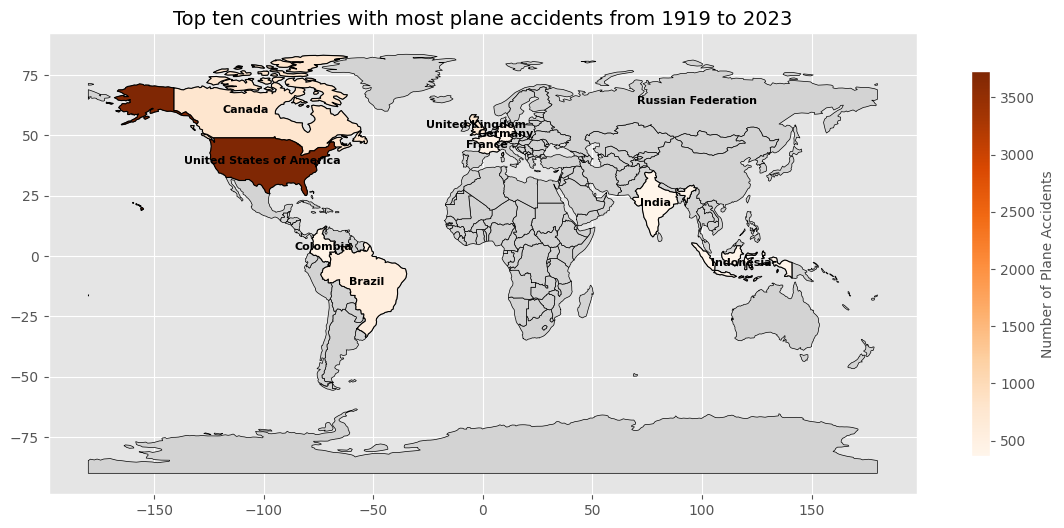

In [94]:
# Create cartogram with colores areas

# Upload the basemap of world

world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Plot map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize data for colormap
norm = cols.Normalize(vmin=gdf['accidents'].min(), vmax=gdf['accidents'].max())

# Change name of country and column in order to merge with world
gdf.loc[0,"country"]="United States of America"
gdf.loc[3,"country"]="United Kingdom"
world=world.rename(columns={"ADMIN":"country"})

# Merge
world = world.merge(gdf, how="inner",on="country")
world = world.set_geometry("geometry_x")

# Draw a map with colors proportional to the accidents
world.plot(column="accidents", cmap="Oranges", linewidth=0.8, edgecolor="black",
           norm=norm, ax=ax, missing_kwds={"color": "lightgrey"})


# Add label of countries
for x, y, label in zip(gdf["longitude"][:10], gdf["latitude"][:10], gdf["country"][:10]):
    plt.text(x, y, label, fontsize=8, ha="center", va="center_baseline", color="black", fontweight="semibold")

# Add color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="Oranges"), ax=ax, shrink=0.5)
cbar.set_label("Number of Plane Accidents", fontsize=10)


plt.title("Top ten countries with most plane accidents from 1919 to 2023", fontsize=14)

plt.show()


#### 8. What types of accidents caused more or fewer fatalities?

In [97]:
#7 What types of accidents caused more or fewer fatalities?

df_cat=df_2.groupby("cat")["fatalities"].count().sort_values(ascending=False).reset_index()

# Category Accident Description
cat=df_cat["cat"].unique()
desc=["Accidents without victims",
      "Accidents with at least one victim",
      "Accidents caused by criminal event",
      "Operational occurance",
      "Hijacking with serious consequences",
      "Less serious accidents criminal event",
      "Serious operational occurance ",
      "Hijacking without consequences",
      "Accidents with unknowwn consequences",
      "Less serious incident than A1 and A2",
      "Less serious operational occurance "]

df_leg=pd.DataFrame(desc,cat)
df_leg.index.name="cat"
df_leg=df_leg.rename(columns={0:"Description"}).reset_index()

cat_leg="\n".join(f"{cat} {desc}" for cat,desc in zip(df_leg["cat"],df_leg["Description"].tolist()))


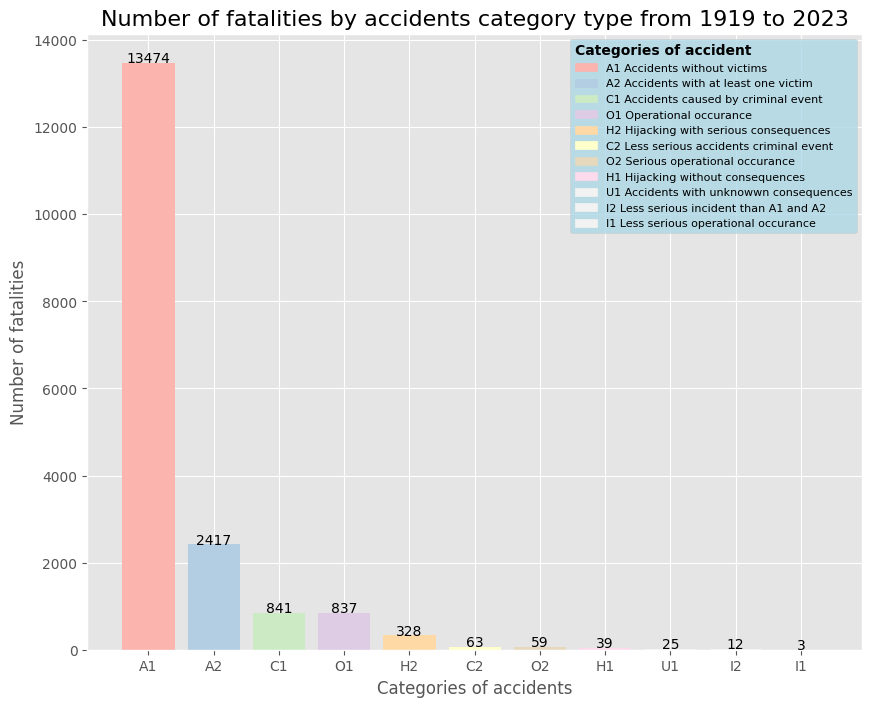

In [96]:
# Create barplot
my_cmap=plt.get_cmap("Pastel1")

# Assign colors for each category
my_cmap = {cat: my_cmap(i) for i, cat in enumerate((df_leg["cat"]))}

col_leg=[my_cmap[i] for i in df_leg["cat"]]

# Develop barchart
plt.figure(figsize=(10,8))
plt.bar(df_cat["cat"],
        df_cat["fatalities"],
        color=col_leg)

# Edit axis label and title
plt.title("Number of fatalities by accidents category type from 1919 to 2023",fontsize=16)
plt.xlabel("Categories of accidents",fontsize=12)
plt.ylabel("Number of fatalities",fontsize=12)

# Create and edit legend
legend_patches = [mpatches.Patch(color=my_cmap[c], label=f"{c} {desc[i]}") for i,c in enumerate(df_leg["cat"])]

legend = plt.legend(
    handles=legend_patches,
    title="Categories of accident",
    loc="upper right",
    fancybox=True,
    fontsize=8,
    frameon=True,
    alignment="left",
    facecolor="lightblue"
)

legend.get_title().set_fontweight("bold")

# Add values label
addlabel(df_cat["cat"], df_cat["fatalities"])
plt.show()